In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import os, re
import pickle

### Poll data

In [2]:
#pool_data = pd.read_csv('dane_years/pools_edited.csv', index_col=0)
pool_data_middle = pd.read_csv('dane_years/pools_data/percent_votes.csv', index_col=0).iloc[:,:-1]
pool_data_middle = pool_data_middle.divide(pool_data_middle.sum(1),0)

### Voting data

In [3]:
path = 'wyniki_wyborow/Simple/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()

In [4]:
files

['2001_WS.csv',
 '2005_WS.csv',
 '2007_WS.csv',
 '2011_WS.csv',
 '2015_WS.csv',
 '2019_WS.csv']

In [5]:
vote_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0))(f) for f in files[:]]
vote_list[0] = vote_list[0].iloc[1:,:]

In [6]:
vote_list[0]['jednostka'] = [j.upper() for j in vote_list[0]['jednostka']]
vote_list[0] = vote_list[0].sort_values(['jednostka'])
vote_list[0].columns = ['województwo'] + vote_list[0].columns.values.tolist()[1:] 

In [7]:
vote_list[0] = vote_list[0].set_index('województwo')

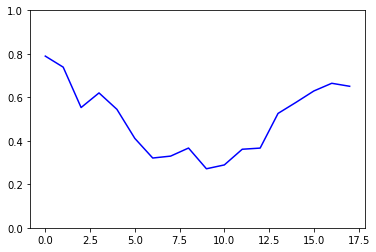

In [8]:
plt.plot(pool_data_middle['Blue'].values[1:],'b')
plt.ylim(0,1)
plt.show()

In [9]:
w = pd.read_csv('dane_years/voters/percent_voters.csv', header=None)[1].values
w.shape

(16,)

In [10]:
pool_data = pool_data_middle.copy()

In [11]:
for vl, i in zip(vote_list.copy(),[0,4,6,10,14,18]):    
    pool_data.iloc[i] = np.average(vl.iloc[:,:-1].div(vl.iloc[:,:-1].sum(1),0), 0, w)

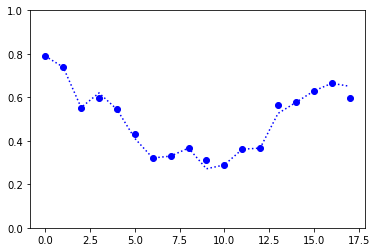

In [12]:
plt.plot(pool_data_middle['Blue'].values[1:],'b:')
plt.plot(pool_data['Blue'].values[1:],'bo')
plt.ylim(0,1)
plt.show()

In [13]:
with open('Y_III.pkl', 'rb') as f:
    Y = pickle.load(f)

In [14]:
Y.shape

(18, 16, 1)

### Computation files

In [15]:
files1 = [f for f in listdir('model/model_III') if re.match(r'.*p1.txt$', f)]
files1.sort()
files1

['each_year_no_timestep1.txt',
 'output_input_each_epochstep1.txt',
 'output_input_each_stepstep1.txt']

In [16]:
out_arr = np.zeros((3,100, 1001, 18))
for i in range(0,len(files1)):
    print(files1[i])
    output = []
    with open('model/model_III/'+files1[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr[i]= np.array(output)

each_year_no_timestep1.txt
output_input_each_epochstep1.txt
output_input_each_stepstep1.txt


In [17]:
files01 = [f for f in listdir('model/model_III') if re.match(r'.*p0.1.txt$', f)]
files01.sort()

out_arr01 = np.zeros((3,100, 1001, 18))
for i in range(0,len(files01)):
    print(files01[i])
    output = []
    with open('model/model_III/'+files01[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr01[i]= np.array(output)

each_year_no_timestep0.1.txt
output_input_each_epochstep0.1.txt
output_input_each_stepstep0.1.txt


In [18]:
files001 = [f for f in listdir('model/model_III') if re.match(r'.*p0.01.txt$', f)]
files001.sort()

out_arr001 = np.zeros((3,100, 1001, 18))
for i in range(0,len(files001)):
    print(files001[i])
    output = []
    with open('model/model_III/'+files001[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr001[i]= np.array(output)

each_year_no_timestep0.01.txt
output_input_each_epochstep0.01.txt
output_input_each_stepstep0.01.txt


In [19]:
files05 = [f for f in listdir('model/model_III') if re.match(r'.*p0.5.txt$', f)]
files05.sort()

out_arr05 = np.zeros((1,100, 1001, 18))
for i in range(0,len(files05)):
    print(files05[i])
    output = []
    with open('model/model_III/'+files05[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr05[i]= np.array(output)

output_input_each_stepstep0.5.txt


## Step 1

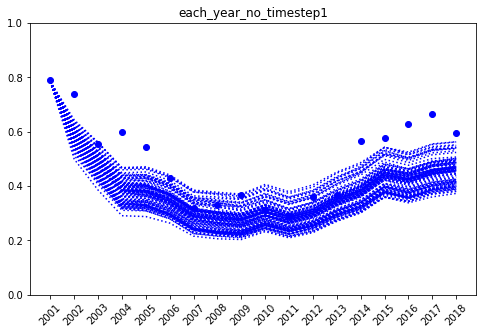

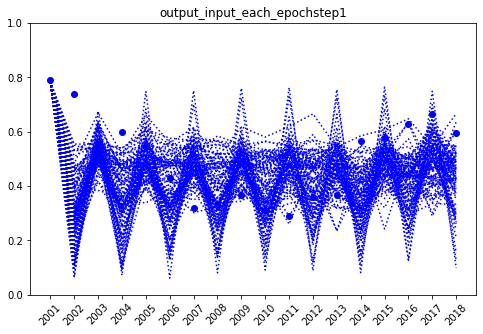

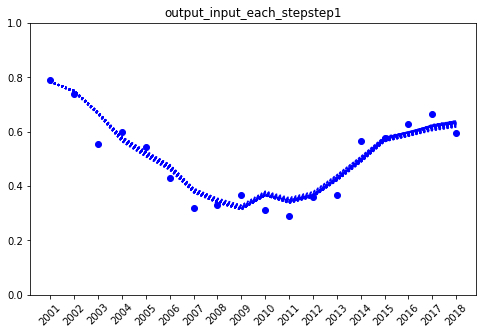

In [19]:
for i in [0,1,2]:
    fig = plt.figure(figsize=(8,5))
    #ax = fig.add_subplot(2,3,i+1)
    #ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    plt.plot(range(2001,2019), plt_arr.T, 'b:')
    plt.plot(range(2001,2019), pool_data['Blue'].values[1:],'bo')
    plt.title(files1[i].split('.txt')[0])
    plt.ylim(0,1)
    plt.xticks(range(2001,2019), rotation=45)
    plt.savefig('model/model_III/'+files1[i]+'.pdf',  bbox_inches='tight')
    
    #np.sum((out_arr[i,:,-1,:] - Y.reshape(-1,1))**2)
    
    #fig = plt.figure(figsize=(8,5))
    #plt.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
    #plt.savefig('model/model1'+files[i]+'_hist.pdf',  bbox_inches='tight')

## Step 0.1

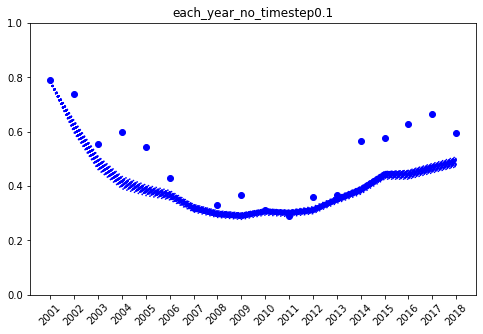

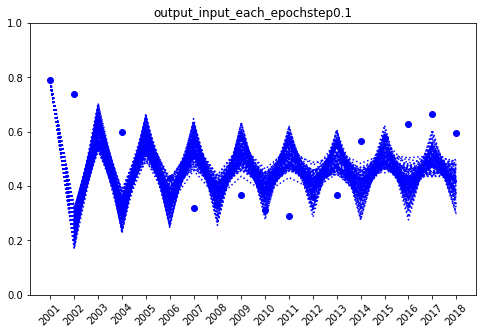

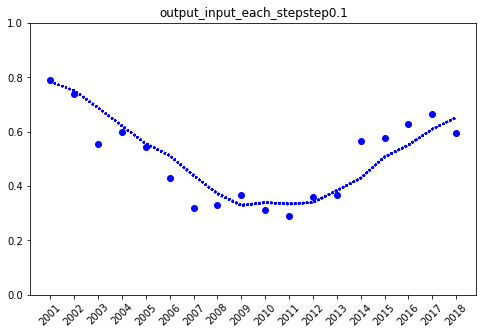

In [20]:
for i in [0,1,2]:
    fig = plt.figure(figsize=(8,5))
    #ax = fig.add_subplot(2,3,i+1)
    #ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr01[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    plt.plot(range(2001,2019), plt_arr.T, 'b:')
    plt.plot(range(2001,2019), pool_data['Blue'].values[1:],'bo')
    plt.title(files01[i].split('.txt')[0])
    plt.ylim(0,1)
    plt.xticks(range(2001,2019), rotation=45)
    plt.savefig('model/model_III/'+files01[i]+'.pdf',  bbox_inches='tight')
    
    #fig = plt.figure(figsize=(8,5))
    #plt.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
    #plt.savefig('model/model1'+files[i]+'_hist.pdf',  bbox_inches='tight')

## Step 0.01

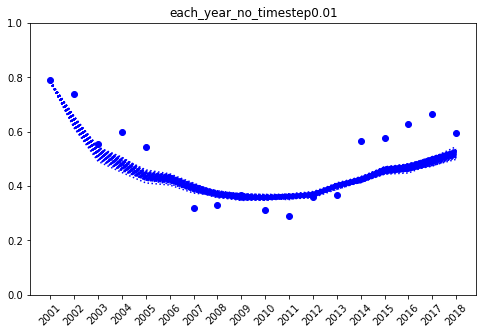

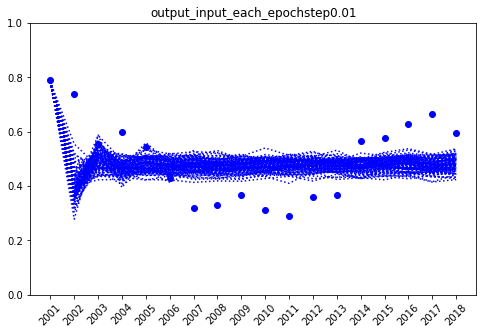

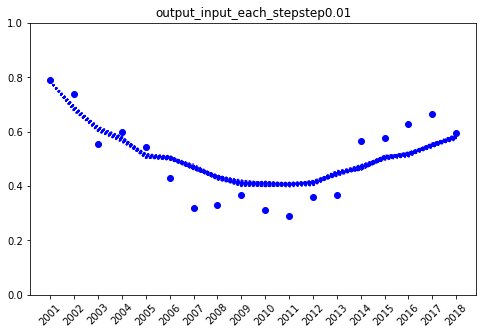

In [21]:
for i in [0,1,2]:
    fig = plt.figure(figsize=(8,5))
    #ax = fig.add_subplot(2,3,i+1)
    #ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr001[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    plt.plot(range(2001,2019), plt_arr.T, 'b:')
    plt.plot(range(2001,2019), pool_data['Blue'].values[1:],'bo')
    plt.title(files001[i].split('.txt')[0])
    plt.ylim(0,1)
    plt.xticks(range(2001,2019), rotation=45)
    plt.savefig('model/model_III/'+files001[i]+'.pdf',  bbox_inches='tight')
    
    #fig = plt.figure(figsize=(8,5))
    #plt.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
    #plt.savefig('model/model1'+files[i]+'_hist.pdf',  bbox_inches='tight')

## Step 0.5

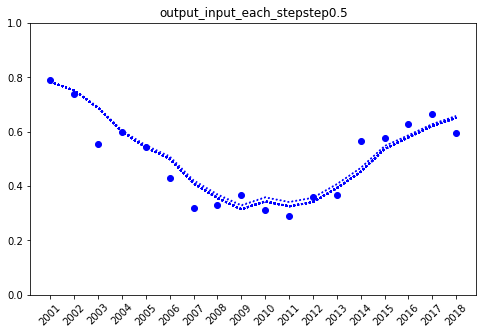

In [18]:
for i in [0]:
    fig = plt.figure(figsize=(8,5))
    #ax = fig.add_subplot(2,3,i+1)
    #ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr05[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    plt.plot(range(2001,2019), plt_arr.T, 'b:')
    plt.plot(range(2001,2019), pool_data['Blue'].values[1:],'bo')
    plt.title(files05[i].split('.txt')[0])
    plt.ylim(0,1)
    plt.xticks(range(2001,2019), rotation=45)
    plt.savefig('model/model_III/'+files05[i]+'.pdf',  bbox_inches='tight')
    
    #np.sum((out_arr[i,:,-1,:] - Y.reshape(-1,1))**2)
    
    #fig = plt.figure(figsize=(8,5))
    #plt.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
    #plt.savefig('model/model1'+files[i]+'_hist.pdf',  bbox_inches='tight')

In [20]:
def save_image(path, i=0):
    fig = plt.figure(1, figsize=(25,5)) 

    out_arr_arr = [out_arr, out_arr01, out_arr001]
    
    for w in range(3):
        ax1 = fig.add_subplot(1,3,w+1)

        #ax1.set_xticks([0,3,5,9,13,16])

        plt_arr = out_arr_arr[w][i,:,-1,:]
        plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
        ax1.plot(range(2001,2019), plt_arr.T, 'b:')
        ax1.plot(range(2001,2019), pool_data['Blue'].values[1:],'bo')

        if w == 0 :
            ax1.set_ylabel(f'Procent poparcia\ndla stronnictwa Niebieskich [%]', size=22)
        else:
            ax1.set_yticks([])

        plt.subplots_adjust(wspace=0.0)

        #plt.title(files001[i].split('.txt')[0])
        ax1.set_ylim(0,1)
        ax1.set_xticks(range(2001,2019))
        ax1.set_xticklabels(range(2001,2019), rotation=60, size=22)
        ax1.yaxis.set_tick_params(labelsize=22)


    fig.text(0.5, -0.15, f'Rok', size=25, ha='center')
    #fig.text(0.08, 0.5, 'Procent poparcia\ndla stronnictwa Niebieskich [%]', va='center', rotation='vertical', size=18)

    plt.savefig(path,  bbox_inches='tight')

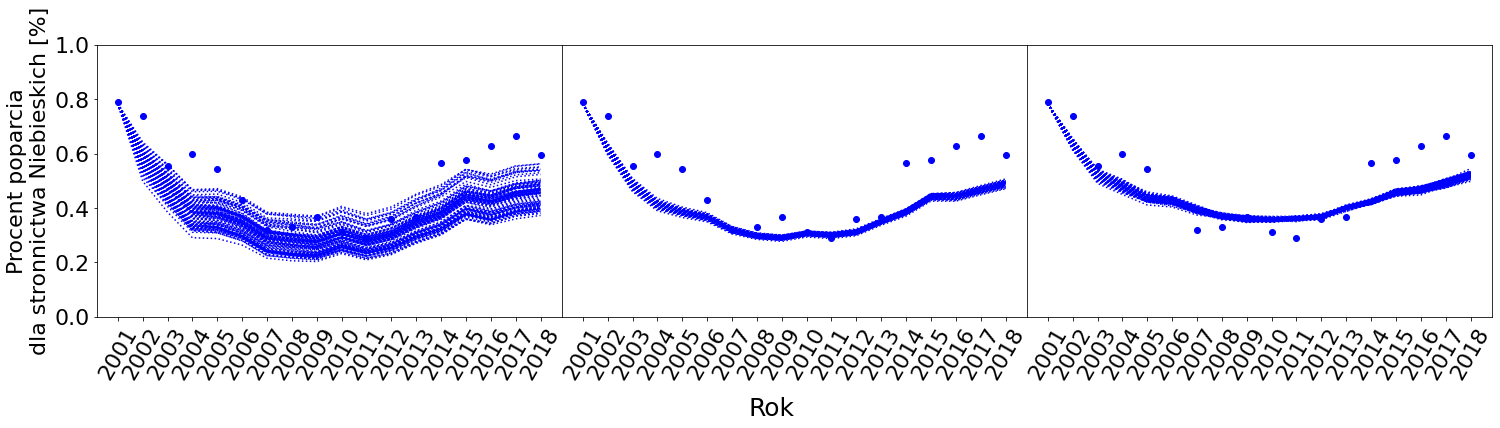

In [26]:
save_image('model/model_II/model2_podejscie2.pdf',0)

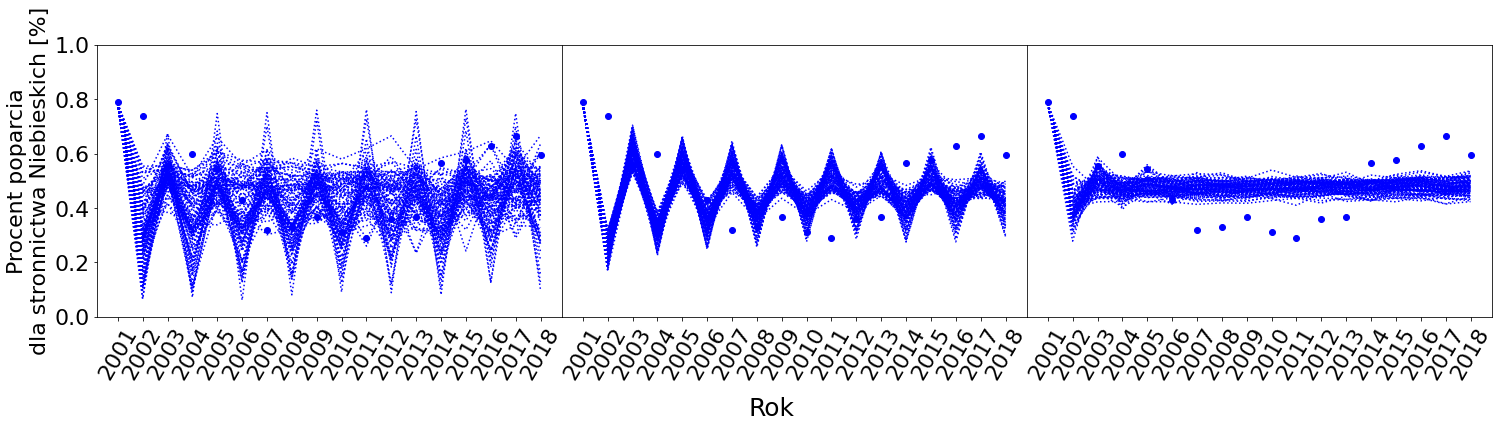

In [27]:
save_image('model/model_II/model2_podejscie3.pdf',1)

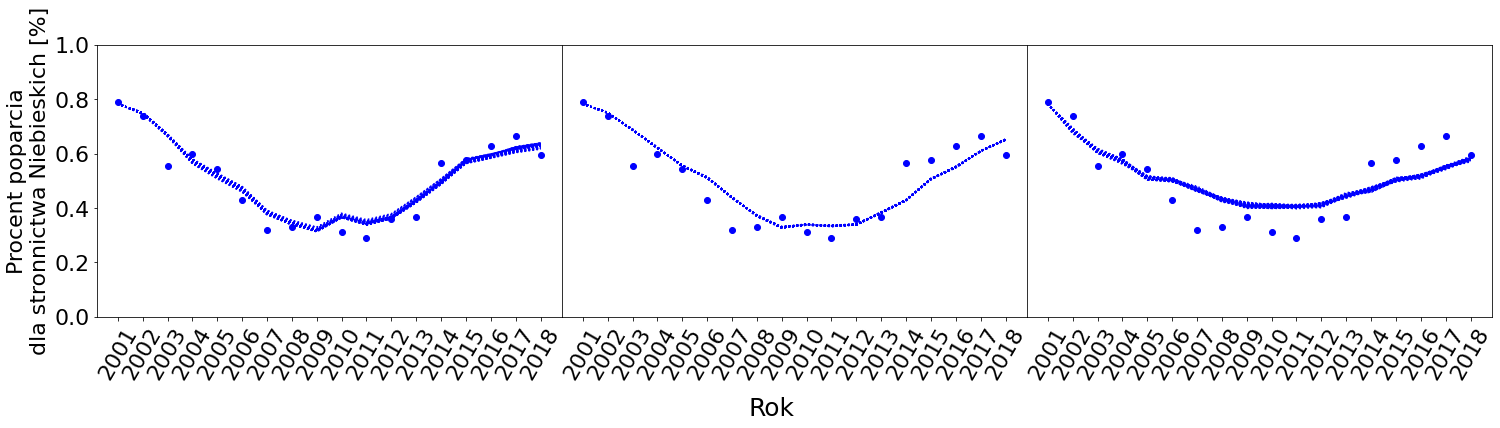

In [28]:
save_image('model/model_II/model2_podejscie4.pdf',2)